In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

## *Load data*

In [2]:
mask_context = [[32,96],[32,96]] # The size and position of the context
mask_gap = [[16,48],[16,48]]     # The size and position (relative to the context) of the gap

In [3]:
gap_dev_pred, discrim_fake_output_dev = [], []

filename = 'G:\\ltyworkstuff\\postdoc\\Results\\\TRGAN_Michele_NEI_LR\\output\\TRGAN_Michele_NEI64_KW1_SW1_NGO32_LR0.00002-150-11-0.5_AR1.e-1_VG0_OL0_GS3\\prediction\\ckpt.1600.h5'
with h5py.File(filename, 'r') as h5f:
    context_dev = np.array(h5f.get('context_dev'))           # context data
    gap_dev = np.array(h5f.get('gap_dev'))                   # true gap data
    gap_dev_pred.append( np.array(h5f.get('gap_dev_pred')) ) # predicted gap data
    discrim_fake_output_dev.append( np.array(h5f.get('discrim_fake_output_dev')) ) # discriminator output

filename = 'G:\\ltyworkstuff\\postdoc\\Results\\\TRGAN_Michele_NEI_LR\\output\\TRGAN_Michele_NEI64_KW1_SW1_NGO32_LR0.00002-150-11-0.5_AR1.e-1_VG0_OL0_GS3\\prediction\\ckpt.1700.h5'
with h5py.File(filename, 'r') as h5f:
    gap_dev_pred.append( np.array(h5f.get('gap_dev_pred')) ) # predicted gap data
    discrim_fake_output_dev.append( np.array(h5f.get('discrim_fake_output_dev')) ) # discriminator output

filename = 'G:\\ltyworkstuff\\postdoc\\Results\\\TRGAN_Michele_NEI_LR\\output\\TRGAN_Michele_NEI64_KW1_SW1_NGO32_LR0.00002-150-11-0.5_AR1.e-1_VG0_OL0_GS3\\prediction\\ckpt.1800.h5'
with h5py.File(filename, 'r') as h5f:
    gap_dev_pred.append( np.array(h5f.get('gap_dev_pred')) ) # predicted gap data
    discrim_fake_output_dev.append( np.array(h5f.get('discrim_fake_output_dev')) ) # discriminator output

## *Statistical results*
### *PDFs of velocity*

Text(0.85, 0.9, '(a)')

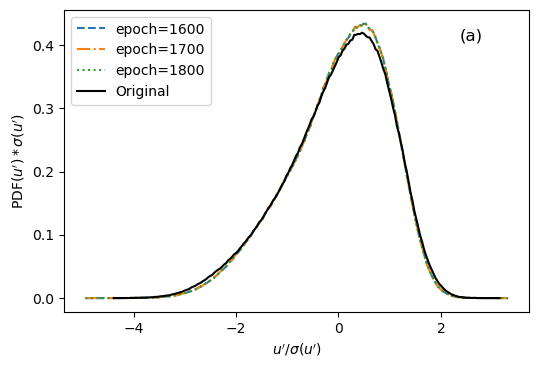

In [4]:
plt.figure(figsize=(6, 4), dpi=100)
plt.xlabel('$u^\prime/\sigma(u^\prime)$')
plt.ylabel('$\mathrm{PDF}(u^\prime)*\sigma(u^\prime)$')

fmt = ['--', '-.', ':']
label = ['epoch=1600', 'epoch=1700', 'epoch=1800']

gap_dev_std = np.std(gap_dev)

for i in range(len(gap_dev_pred)):
    hist, bin_edges = np.histogram(gap_dev_pred[i], bins=200, density=True)
    hist *= gap_dev_std
    bin_edges /= gap_dev_std
    plt.plot(bin_edges[0:len(hist)] + 0.5*(bin_edges[1]-bin_edges[0]), hist, fmt[i], label=label[i], linewidth=1.5)

hist, bin_edges = np.histogram(gap_dev, bins=200, density=True)
hist *= gap_dev_std
bin_edges /= gap_dev_std
plt.plot(bin_edges[0:len(hist)] + 0.5*(bin_edges[1]-bin_edges[0]), hist, '-k', label='Original', linewidth=1.5)

plt.legend(loc='upper left')
plt.annotate('(a)', (0.85, 0.9), xycoords='axes fraction', fontsize=12)

Text(0.85, 0.9, '(b)')

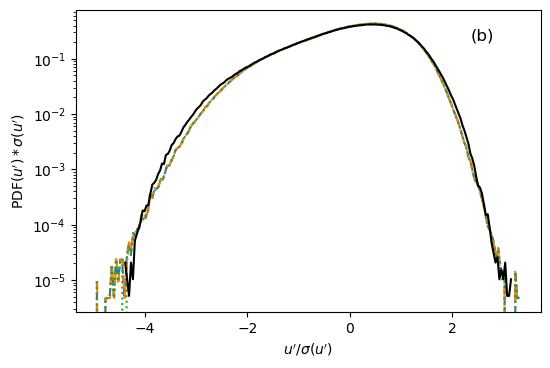

In [5]:
plt.figure(figsize=(6, 4), dpi=100)
plt.yscale("log")
plt.xlabel('$u^\prime/\sigma(u^\prime)$')
plt.ylabel('$\mathrm{PDF}(u^\prime)*\sigma(u^\prime)$')

fmt = ['--', '-.', ':']
label = ['epoch=1600', 'epoch=1700', 'epoch=1800']

gap_dev_std = np.std(gap_dev)

for i in range(len(gap_dev_pred)):
    hist, bin_edges = np.histogram(gap_dev_pred[i], bins=200, density=True)
    hist *= gap_dev_std
    bin_edges /= gap_dev_std
    plt.plot(bin_edges[0:len(hist)] + 0.5*(bin_edges[1]-bin_edges[0]), hist, fmt[i], label=label[i], linewidth=1.5)

hist, bin_edges = np.histogram(gap_dev, bins=200, density=True)
hist *= gap_dev_std
bin_edges /= gap_dev_std
plt.plot(bin_edges[0:len(hist)] + 0.5*(bin_edges[1]-bin_edges[0]), hist, '-k', label='Original', linewidth=1.5)

plt.annotate('(b)', (0.85, 0.9), xycoords='axes fraction', fontsize=12)

### *PDFs of velocity gradient*

In [6]:
def ddx_gradient(context, gap, mask_gap):
    shape = context.shape

    inpt = np.zeros([shape[0], shape[1], mask_gap[1][1]-mask_gap[1][0], shape[3]])
    inpt[:,mask_gap[0][0]:mask_gap[0][1],:,:] = gap.copy()

    inpt += context[:, :, mask_gap[1][0]:mask_gap[1][1], :]

    output = np.gradient(inpt, 4*np.pi/128, axis=1)

    return output[:, mask_gap[0][0]:mask_gap[0][1], :, :]

In [7]:
def ddy_gradient(context, gap, mask_gap):
    shape = context.shape

    inpt = np.zeros([shape[0], mask_gap[0][1]-mask_gap[0][0], shape[2], shape[3]])
    inpt[:,:,mask_gap[1][0]:mask_gap[1][1],:] = gap.copy()

    inpt += context[:, mask_gap[0][0]:mask_gap[0][1], :, :]

    output = np.gradient(inpt, 2*np.pi/128, axis=2)

    return output[:, :, mask_gap[1][0]:mask_gap[1][1], :]

In [8]:
# Compute velocity gradient by second order central difference (2nd CD)
dudx_dev = ddx_gradient(context_dev, gap_dev, mask_gap)
dudy_dev = ddy_gradient(context_dev, gap_dev, mask_gap)

dudx_dev_pred, dudy_dev_pred = [], []

for i in range(len(gap_dev_pred)):
    dudx_dev_pred.append( ddx_gradient(context_dev, gap_dev_pred[i], mask_gap) )
    dudy_dev_pred.append( ddy_gradient(context_dev, gap_dev_pred[i], mask_gap) )

Text(0.85, 0.9, '(a)')

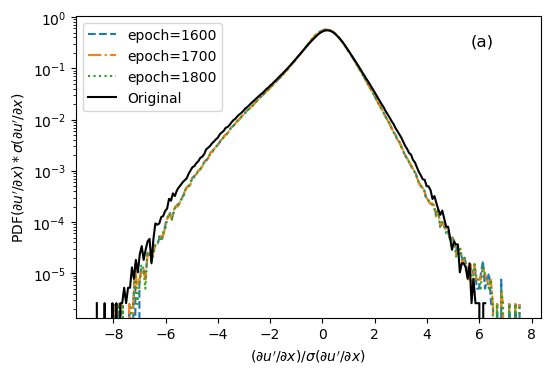

In [9]:
plt.figure(figsize=(6, 4), dpi=100)
plt.yscale("log")
plt.xlabel('$(\partial u^\prime/\partial x)/\sigma(\partial u^\prime/\partial x)$')
plt.ylabel('$\mathrm{PDF}(\partial u^\prime/\partial x)*\sigma(\partial u^\prime/\partial x)$')

fmt = ['--', '-.', ':']
label = ['epoch=1600', 'epoch=1700', 'epoch=1800']

dudx_dev_std = np.std(dudx_dev)

for i in range(len(gap_dev_pred)):
    hist, bin_edges = np.histogram(dudx_dev_pred[i], bins=200, density=True)
    hist *= dudx_dev_std
    bin_edges /= dudx_dev_std
    plt.plot(bin_edges[0:len(hist)] + 0.5*(bin_edges[1]-bin_edges[0]), hist, fmt[i], label=label[i], linewidth=1.5)

hist, bin_edges = np.histogram(dudx_dev, bins=200, density=True)
hist *= dudx_dev_std
bin_edges /= dudx_dev_std
plt.plot(bin_edges[0:len(hist)] + 0.5*(bin_edges[1]-bin_edges[0]), hist, '-k', label='Original', linewidth=1.5)

plt.legend(loc='upper left')
plt.annotate('(a)', (0.85, 0.9), xycoords='axes fraction', fontsize=12)

Text(0.85, 0.9, '(b)')

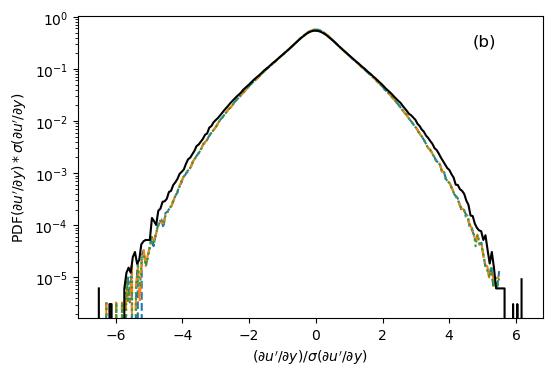

In [10]:
plt.figure(figsize=(6, 4), dpi=100)
plt.yscale("log")
plt.xlabel('$(\partial u^\prime/\partial y)/\sigma(\partial u^\prime/\partial y)$')
plt.ylabel('$\mathrm{PDF}(\partial u^\prime/\partial y)*\sigma(\partial u^\prime/\partial y)$')

fmt = ['--', '-.', ':']

dudy_dev_std = np.std(dudy_dev)

for i in range(len(gap_dev_pred)):
    hist, bin_edges = np.histogram(dudy_dev_pred[i], bins=200, density=True)
    hist *= dudy_dev_std
    bin_edges /= dudy_dev_std
    plt.plot(bin_edges[0:len(hist)] + 0.5*(bin_edges[1]-bin_edges[0]), hist, fmt[i], linewidth=1.5)

hist, bin_edges = np.histogram(dudy_dev, bins=200, density=True)
hist *= dudy_dev_std
bin_edges /= dudy_dev_std
plt.plot(bin_edges[0:len(hist)] + 0.5*(bin_edges[1]-bin_edges[0]), hist, '-k', linewidth=1.5)

plt.annotate('(b)', (0.85, 0.9), xycoords='axes fraction', fontsize=12)